In [1]:
dino_vectors = [(6,4), (3,1), (1,2), (-1,5), (-2,5), (-3,4), (-4,4),
(-5,3), (-5,2), (-2,2), (-5,1), (-4,0), (-2,1), (-1,0), (0,-3),
(-1,-4), (1,-4), (2,-3), (1,-2), (3,-1), (5,1)
]

### method 1

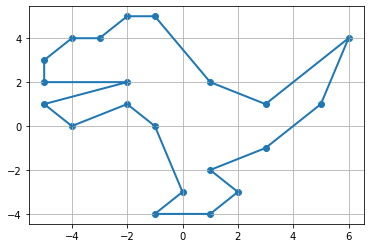

In [71]:
import matplotlib.pyplot as plt
import numpy as np
fig, ax = plt.subplots()
dino_vectors1 = np.array(dino_vectors)
plt.scatter(dino_vectors1[:,0],dino_vectors1[:,1])
plt.plot(dino_vectors1[:,0],dino_vectors1[:,1],linewidth=2, linestyle='-',color="tab:blue")
plt.plot(*list(zip(dino_vectors1[0],dino_vectors1[-1])),linewidth=2, linestyle='-',color="tab:blue")
plt.grid()

### method 2

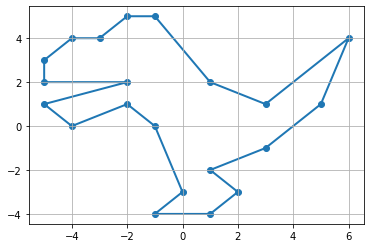

In [72]:
import matplotlib.pyplot as plt
import numpy as np
fig, ax = plt.subplots()
dino_vectors1 = np.array(dino_vectors)
p = Polygon(dino_vectors1, closed=True,fill=False,color="tab:blue",linewidth=2)
ax.add_patch(p)
plt.scatter(dino_vectors1[:,0],dino_vectors1[:,1])
plt.grid()

In [73]:
def add(v1,v2):
    return (v1[0] + v2[0], v1[1] + v2[1])

dino_vectors2 = [add((-1.5,-2.5), v) for v in dino_vectors]

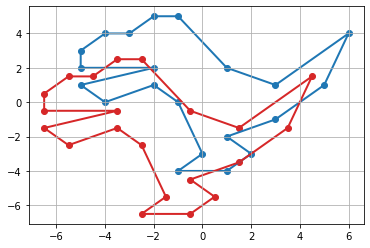

In [77]:
import matplotlib.pyplot as plt
import numpy as np
fig, ax = plt.subplots()
p = Polygon(dino_vectors1, closed=True,fill=False,color="tab:blue",linewidth=2)
ax.add_patch(p)
plt.scatter(dino_vectors1[:,0],dino_vectors1[:,1],color="tab:blue")
plt.grid()

dino_vectors2 = np.array(dino_vectors2)
p = Polygon(dino_vectors2, closed=True,fill=False,color="tab:red",linewidth=2)
ax.add_patch(p)
plt.scatter(dino_vectors2[:,0],dino_vectors2[:,1],color="tab:red")



In [78]:
from math import sqrt
def length(v):
    return sqrt(v[0]**2 + v[1]**2)

In [79]:
def add(*vectors):
    return (sum([v[0] for v in vectors]), sum([v[1] for v in vectors]))

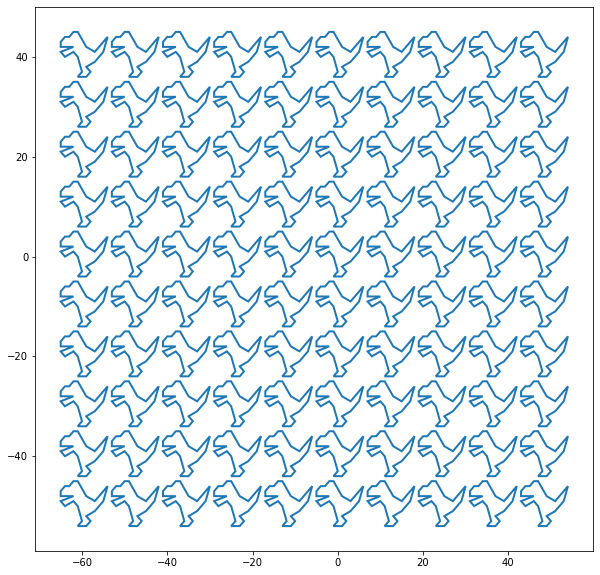

In [94]:
def translate(translation, vectors):
    return [add(translation, v) for v in vectors]

def hundred_dinos():
    fig, ax = plt.subplots(figsize=(10,10))
    translations = [(12*x,10*y)
                for x in range(-5,5)
                for y in range(-5,5)]
    dinos = [translate(t, dino_vectors) for t in translations]
    for dino in dinos:
        dino = np.array(dino)
        p = Polygon(dino, closed=True,fill=False,color="tab:blue",linewidth=2)
        ax.add_patch(p)
        #plt.plot(dino[:,0],dino[:,1],color="tab:blue")
        plt.plot()
hundred_dinos()    

In [96]:
from math import sin, cos, pi
def to_cartesian(polar_vector):
    length, angle = polar_vector[0], polar_vector[1]
    return (length*cos(angle), length*sin(angle))
angle = 37*pi/180
to_cartesian((5,angle))

(3.993177550236464, 3.0090751157602416)

In [97]:
from math import atan2
atan2(3,-2)

2.158798930342464

In [98]:
from math import asin
sin(1),asin(0.8414709848078965)

(0.8414709848078965, 1.0)

In [99]:
from math import sqrt
asin(3/sqrt(13))

0.9827937232473292

In [100]:
from math import acos
acos(-2/sqrt(13))

2.1587989303424644

In [101]:
def to_polar(vector):
    x, y = vector[0], vector[1]
    angle = atan2(y,x)
    return (length(vector), angle)

In [102]:
to_polar((-2,3))

(3.605551275463989, 2.158798930342464)

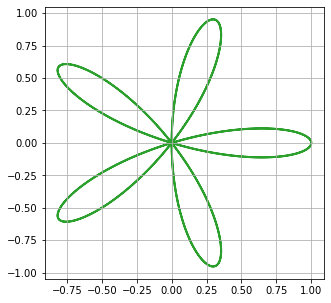

In [110]:
polar_coords = [(cos(x*pi/100.0), 2*pi*x/1000.0) for x in range(0,1000)]
vectors = [to_cartesian(p) for p in polar_coords]
p = Polygon(vectors, closed=True,fill=False,color="tab:green",linewidth=2)
fig, ax = plt.subplots(figsize=(5,5))
ax.add_patch(p)
plt.plot()
plt.grid()

In [116]:
from math import atan
atan(-3/2)

-0.982793723247329

In [117]:
atan2(-3,2)

-0.982793723247329

In [115]:
atan2(3,-2)

2.158798930342464

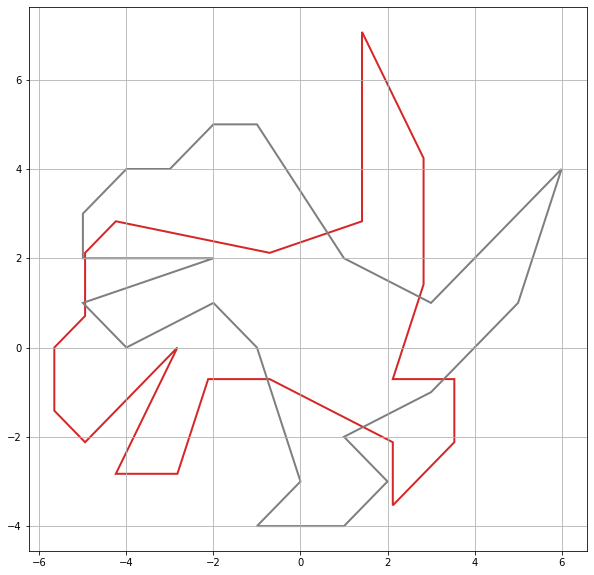

In [124]:
rotation_angle = pi/4
dino_polar = [to_polar(v) for v in dino_vectors]
dino_rotated_polar = [(l,angle + rotation_angle) for l,angle in dino_polar]
dino_rotated = [to_cartesian(p) for p in dino_rotated_polar]
fig, ax = plt.subplots(figsize=(10,10))
dino_rotated = np.array(dino_rotated)
p = Polygon(dino_rotated, closed=True,fill=False,color="tab:red",linewidth=2)
ax.add_patch(p)
dino_vectors = np.array(dino_vectors)
p = Polygon(dino_vectors, closed=True,fill=False,color="tab:grey",linewidth=2)
ax.add_patch(p)
plt.plot()
plt.grid()

### 2.5 Drawing with Matplotlib

In [127]:
import matplotlib
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection

class Points():
    def __init__(self, *vectors, color='tab:black'):
        self.vectors = list(vectors)
        self.color = color
        
def draw(*objects):
    for object in objects:
        if type(object) != Points:
            pass
        elif type(object) == Points:
            xs = [v[0] for v in object.vectors]
            ys = [v[1] for v in object.vectors]
            plt.scatter(xs, ys, color=object.color)